In [21]:
# A TensorFlow implementation of Local Binary Patterns Transform, 2021, Volume: 9 Issue: 1, 15 - 21, 30.06.2021
#https://dergipark.org.tr/en/pub/mjen/issue/64132/822630
import os
import sys
#Check your path and replace it with the below path 
path = '/home/ubuntu/Documents/lbp_tensorflow_python-main' 
if module_path not in sys.path:
    sys.path.append(path)

In [22]:
from tensorflow.keras.datasets import cifar10
from lib.lbplib import py_lbp,tf_lbp
import numpy as np
import time
import matplotlib.pyplot as plt

In [18]:
def py_extract_lbp_rgb(x_train):
    [N,Rows,Cols,Channels]=x_train.shape    
    x_train_lbp=np.zeros(shape=(N,Rows,Cols,Channels),dtype='uint8')    
    for i in range(N):
        x_train_lbp[i,:,:,0]=py_lbp(x_train[i,:,:,0])
        x_train_lbp[i,:,:,1]=py_lbp(x_train[i,:,:,1])
        x_train_lbp[i,:,:,2]=py_lbp(x_train[i,:,:,2])         
    return x_train_lbp
def tf_extract_lbp_rgb(x_train):
    [N,Rows,Cols,Channels]=x_train.shape
    x_train_lbp=np.zeros(shape=(N,Rows,Cols,Channels),dtype='uint8') 
    x_train_lbp[:,:,:,0]=tf_lbp(x_train[:,:,:,0].astype('uint8')).numpy()
    x_train_lbp[:,:,:,1]=tf_lbp(x_train[:,:,:,1].astype('uint8')).numpy()
    x_train_lbp[:,:,:,2]=tf_lbp(x_train[:,:,:,2].astype('uint8')).numpy()
    return x_train_lbp

In [19]:
# load dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#use first 100 images for test
x_train=x_train[:100,:,:,:]
  
# Extract lbp features for Cifar10 dataset using TensorFlow
start_time   = time.time() 

#process all images in the Cifar10 --------------------------------------------
x_train_lbp_tf = tf_extract_lbp_rgb(x_train) 

elapsed_tf = time.time() - start_time
print('tensor flow elapsed_time=',elapsed_tf)

# Extract lbp features for Cifar10 dataset ------------------------------------
start_time   = time.time()

#process all images in the Cifar10
x_train_lbp_py = py_extract_lbp_rgb(x_train) 

elapsed_py = time.time() - start_time
print('python elapsed_time=',elapsed_py)

    
# Check error
print('error=',np.sum(x_train_lbp_py-x_train_lbp_tf))


tensor flow elapsed_time= 0.01941227912902832
python elapsed_time= 2.6346142292022705
error= 0


<Figure size 640x480 with 0 Axes>

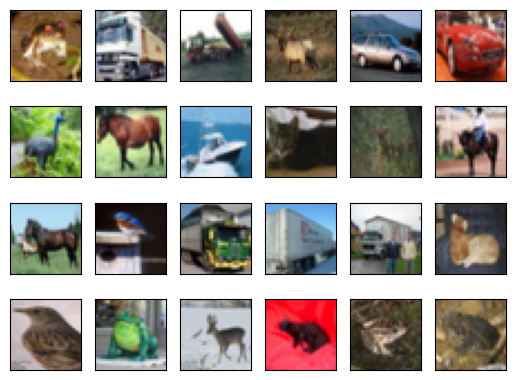

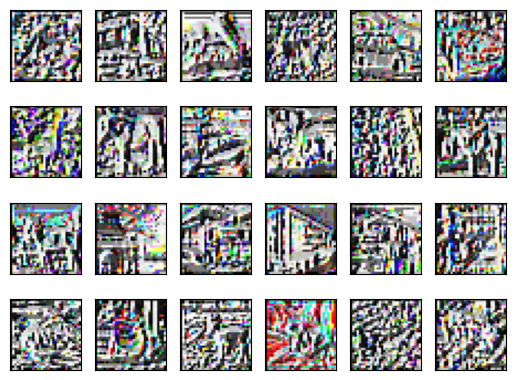

In [20]:
# Example images---------------------------------------------------------------
#input images
plt.figure(1)
figs, axes = plt.subplots(4, 6)
for i in range(4):
    for j in range(6): 
        axes[i, j].imshow(x_train[i*6+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# LBP images
plt.figure(2)
figs, axes = plt.subplots(4, 6)
for i in range(4):
    for j in range(6): 
        axes[i, j].imshow(x_train_lbp_tf[i*6+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
